In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

np.random.seed(1)
cancer = load_breast_cancer()
columns = np.append(cancer["feature_names"], "target")
data = np.column_stack((cancer["data"], cancer["target"]))
df = pd.DataFrame(data=data, columns=columns)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [2]:
x = df.drop("target", axis = 1).to_numpy()#convert the data into numpy array
y = df.get("target").to_numpy() #convert series(569,) to numpy array(569,1)
y = y.reshape(569, 1)
x = np.transpose(x)
y = np.transpose(y)
print(x.shape, y.shape)

(30, 569) (1, 569)


In [3]:
#Let the first 400 features be the training set and the remaining be the test set
x_train = x[0:,0:400]
y_train = y[:,0:400]
x_test = x[:,400:]
y_test = y[:,400:]
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(30, 400) (1, 400) (30, 169) (1, 169)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_train)

In [5]:
def initialize(params):
    #W = np.random.randn(params, 1)*0.01
    W= np.zeros((params,1))
    b= 0
    return W, b

In [6]:
def sigmoid(z):
    #z = Wx+b
    s = 1/(1+np.exp(-z))
    return s

In [7]:
def forward_prop(W, b, X, Y):
    A = sigmoid(np.dot(W.T, X)+b)
    cost = (np.sum(np.multiply(Y, np.log(A)) + np.multiply((1-Y), np.log(1-A))))/-X.shape[1]
    dW = (np.dot(X, (A-Y).T))/X.shape[1]
    db = (np.sum((A-Y).T))/X.shape[1]
    
    cost = np.squeeze(cost)
    grads = {
        "dW" : dW,
        "db" : db
    }
    return grads, cost

In [8]:
def optimize(x, y, iterations, lr):
    W, b = initialize(x.shape[0])
    costs = []
    for i in range(iterations):
        grads, cost = forward_prop(W, b, x, y)
        dW = grads["dW"]
        db = grads["db"]
        W = W-lr*dW
        b = b-lr*db
        if i%250==0:
            costs.append(cost)
    params = {"W": W,
              "b": b}
    
    grads = {"dW": dW,
             "db": db}
    
    return params, grads, costs

In [9]:
def accuracy(y_hat, y):
    dm = y-y_hat
    count = np.count_nonzero(dm, axis=1)
    return count/y.shape[1]

In [10]:
def predict(W, b, x):
    z = np.dot(W.T, x)+b
    a = sigmoid(z)
    ans = np.where(a>0.5, 1, 0)
    return ans

In [59]:
p,g,c=optimize(x_scaled, y_train, 50000, 0.6)

In [69]:
y_hat = predict(p["W"], p["b"], x_train)

y_hat_test = predict(p["W"], p["b"], x_test)

<ipython-input-6-74d8fde65921>:3: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


In [71]:
acc = accuracy(y_hat, y_train)
perc_acc = np.squeeze((1-acc)*100)
test_acc = np.squeeze((1-accuracy(y_hat_test, y_test))*100)
print("Accuracy for train set: {} %".format(perc_acc))
print("Accuracy for test set: {} %".format(test_acc))

Accuracy for train set: 92.0 %
Accuracy for test set: 95.26627218934911 %


In [72]:
c

[0.6931471805599452,
 0.25875403729554924,
 0.23386524968668687,
 0.22040810472550298,
 0.21225568259307293,
 0.20683060808750608,
 0.20295763114534218,
 0.2000420343097986,
 0.1977539566651604,
 0.1958968136555316,
 0.1943467431375989,
 0.19302220246964003,
 0.19186757557835726,
 0.19084380694554748,
 0.18992279000158072,
 0.18908386943724223,
 0.18831158724021668,
 0.18759418828029925,
 0.18692260483901568,
 0.1862897516413424,
 0.1856900271340627,
 0.18511895472521536,
 0.18457292082589652,
 0.18404898099172903,
 0.18354471470925302,
 0.18305811541316225,
 0.18258750634096735,
 0.1821314755539353,
 0.1816888253252304,
 0.18125853240206843,
 0.18083971657160755,
 0.1804316156204465,
 0.18003356525505917,
 0.17964498289939057,
 0.17926535454321552,
 0.178894224006425,
 0.17853118412814659,
 0.17817586949831057,
 0.17782795043206165,
 0.17748712795090563,
 0.17715312958346985,
 0.17682570583679025,
 0.1765046272187344,
 0.17618968171547764,
 0.17588067264634397,
 0.17557741683290234,
 

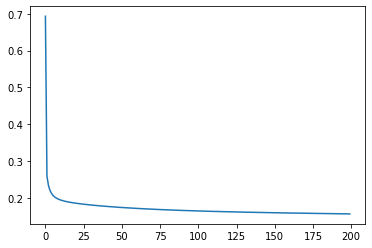

In [73]:
from matplotlib import pyplot as plt
plt.plot(c)